In [1]:
import yfinance as yf

msft = yf.Ticker("MSFT")

# get all stock info
msft.info

# get historical market data
hist = msft.history(period="1mo")

In [2]:
df = msft.earnings_history

In [3]:
df

,epsEstimate,epsActual,epsDifference,surprisePercent
2023-09-30,2.42,2.73,0.31,0.128
2023-12-31,2.78,2.93,0.15,0.054
2024-03-31,2.82,2.94,0.12,0.043
2024-06-30,2.93,2.95,0.02,0.007


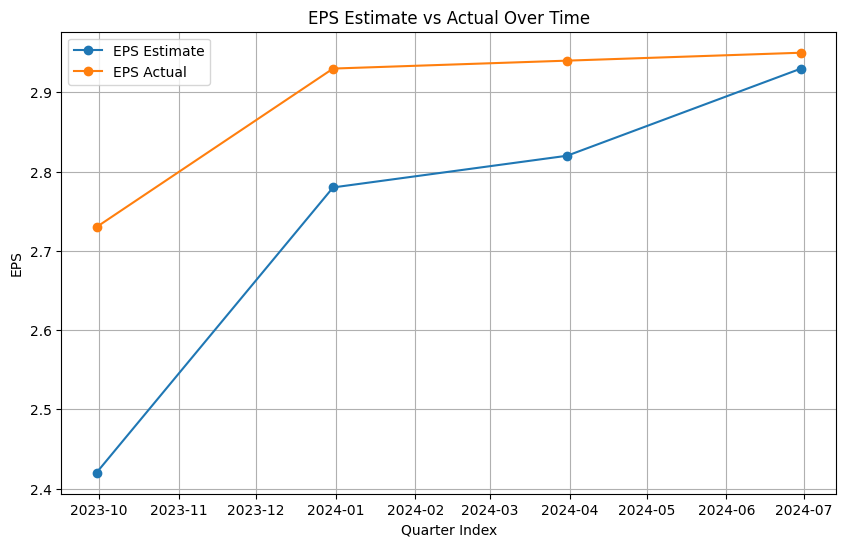

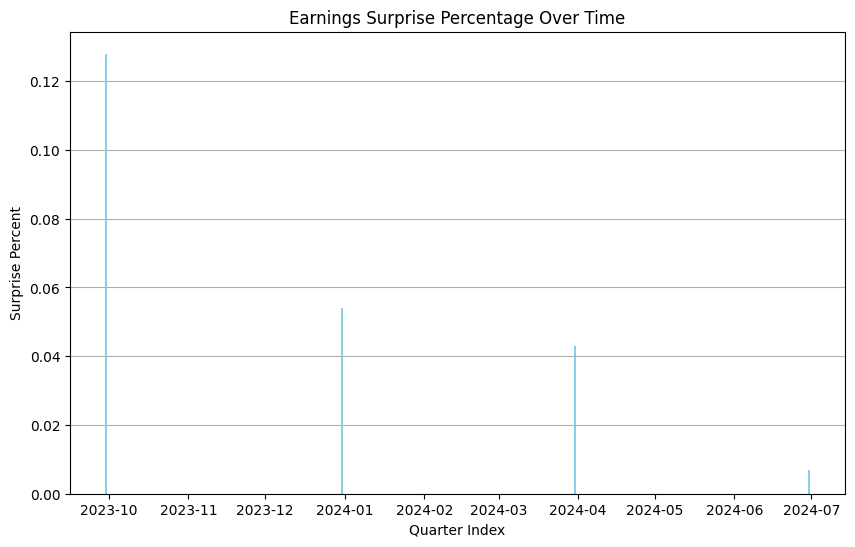

Correlation between EPS Estimate and EPS Actual: 0.98
            estimate_pct_change  actual_pct_change
2023-09-30                  NaN                NaN
2023-12-31             0.148760           0.073260
2024-03-31             0.014388           0.003413
2024-06-30             0.039007           0.003401
Average EPS Estimate Error: 0.15
Standard Deviation of EPS Estimate Error: 0.12


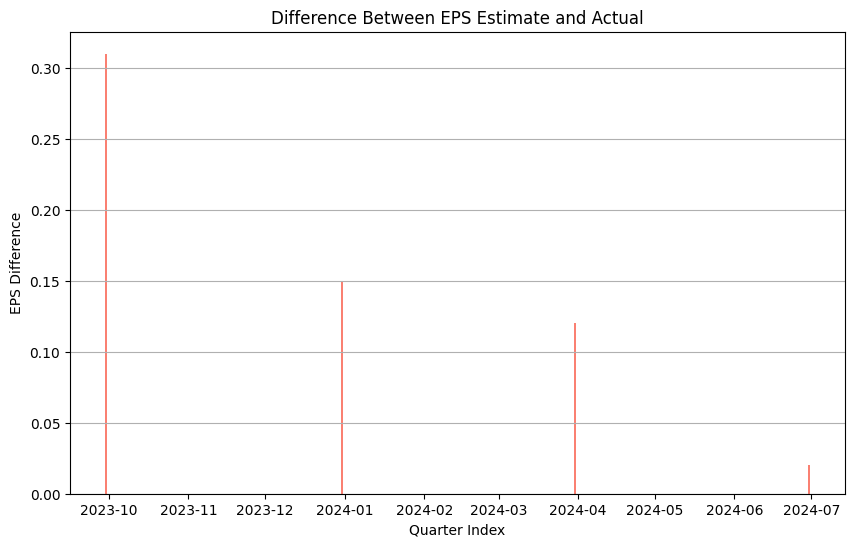

Regression line: y = 0.47x + 1.61
R-squared: 0.95, p-value: 2.35e-02


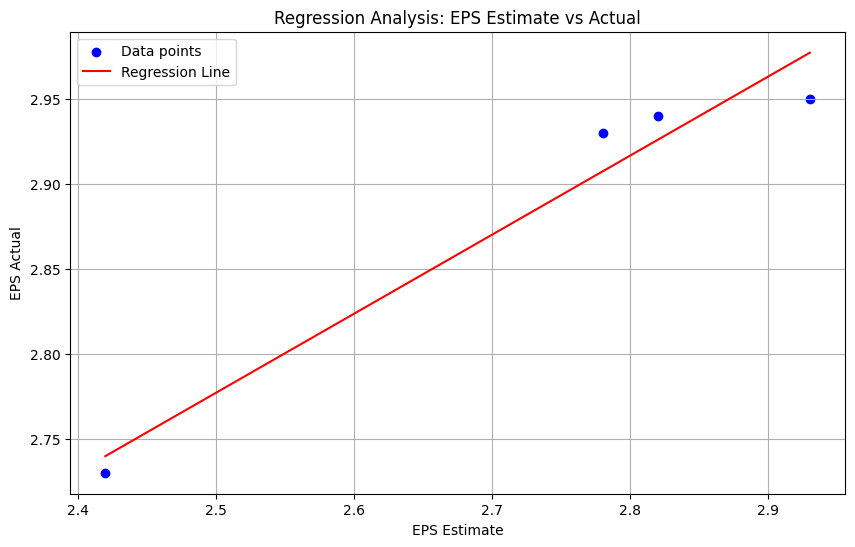

T-statistic: 2.28, p-value: 1.07e-01
The average surprise percent is not significantly different from zero (fail to reject null hypothesis).


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats


# 1. Trend Analysis: Plot EPS Estimate and Actual using index
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['epsEstimate'], marker='o', label='EPS Estimate')
plt.plot(df.index, df['epsActual'], marker='o', label='EPS Actual')
plt.xlabel('Quarter Index')
plt.ylabel('EPS')
plt.title('EPS Estimate vs Actual Over Time')
plt.legend()
plt.grid(True)
plt.show()

# 2. Surprise Analysis: Plot Surprise Percent using index
plt.figure(figsize=(10, 6))
plt.bar(df.index, df['surprisePercent'], color='skyblue')
plt.xlabel('Quarter Index')
plt.ylabel('Surprise Percent')
plt.title('Earnings Surprise Percentage Over Time')
plt.grid(axis='y')
plt.show()

# 3. Correlation Analysis
correlation = df[['epsEstimate', 'epsActual']].corr().iloc[0, 1]
print(f"Correlation between EPS Estimate and EPS Actual: {correlation:.2f}")

# 4. Percentage Change Calculation
df['estimate_pct_change'] = df['epsEstimate'].pct_change()
df['actual_pct_change'] = df['epsActual'].pct_change()
print(df[['estimate_pct_change', 'actual_pct_change']])

# 5. Accuracy of Estimates
mean_error = df['epsDifference'].mean()
std_error = df['epsDifference'].std()
print(f"Average EPS Estimate Error: {mean_error:.2f}")
print(f"Standard Deviation of EPS Estimate Error: {std_error:.2f}")

# 6. Visualization: EPS Differences using index
plt.figure(figsize=(10, 6))
plt.bar(df.index, df['epsDifference'], color='salmon')
plt.xlabel('Quarter Index')
plt.ylabel('EPS Difference')
plt.title('Difference Between EPS Estimate and Actual')
plt.grid(axis='y')
plt.show()

# 7. Statistical Analysis: Regression Analysis
slope, intercept, r_value, p_value, std_err = stats.linregress(df['epsEstimate'], df['epsActual'])
print(f"Regression line: y = {slope:.2f}x + {intercept:.2f}")
print(f"R-squared: {r_value**2:.2f}, p-value: {p_value:.2e}")

# Plotting Regression using index
plt.figure(figsize=(10, 6))
plt.scatter(df['epsEstimate'], df['epsActual'], color='blue', label='Data points')
plt.plot(df['epsEstimate'], intercept + slope * df['epsEstimate'], color='red', label='Regression Line')
plt.xlabel('EPS Estimate')
plt.ylabel('EPS Actual')
plt.title('Regression Analysis: EPS Estimate vs Actual')
plt.legend()
plt.grid(True)
plt.show()

# 8. Hypothesis Test on Surprise Percent
# Null hypothesis: Surprise Percent mean is zero
t_stat, p_value = stats.ttest_1samp(df['surprisePercent'], 0)
print(f"T-statistic: {t_stat:.2f}, p-value: {p_value:.2e}")

if p_value < 0.05:
    print("The average surprise percent is significantly different from zero (reject null hypothesis).")
else:
    print("The average surprise percent is not significantly different from zero (fail to reject null hypothesis).")
